In [1]:
import pandas as pd
import csv
import random

In [2]:
rows = 500
with open('data.csv', 'w') as f:
    file = csv.writer(f)

    file.writerow(['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])
   
    for _ in range(rows):
        salary = random.randint(30000, 100000)
        city = random.choice(['Moscow', 'Ottava', 'Washington', 'Pekin', 'Brazilia', 'Canberra', 'Deli', 'Buenos-Aires', 'Astana'])
        age = random.randint(30, 65)
        vacation_prefer = random.choice(['Karaoke', 'Movie', 'Computer games', 'Sleeping', 'Sport', 'Reading', 'Walking', 'Cooking'])
        transport_prefer = random.choice(['auto', 'plane', 'train', 'boat', 'cruise'])
        target = random.choice(['Saint-Petersburg', 'Toronto', 'New York', 'Shanhai', 'Rio', 'Sydney', 'Mumbai', 'Rosario'])
    
        file.writerow([salary, city, age, vacation_prefer, transport_prefer, target])

In [3]:
df = pd.read_csv('data.csv')
data1 = df.copy(deep=True)

In [4]:
df.isnull().sum()

salary              0
city                0
age                 0
vacation_prefer     0
transport_prefer    0
target              0
dtype: int64

In [5]:
df_encoded = df.copy()
dummies = pd.get_dummies(df_encoded, columns=['city', 'vacation_prefer', 'transport_prefer', 'target'],  drop_first=True)
merged = pd.concat([df_encoded, dummies], axis='columns')
merged.drop(['city', 'vacation_prefer', 'transport_prefer', 'target'], axis='columns')
print(merged)

     salary        city  age vacation_prefer transport_prefer  \
0     60392        Deli   36           Sport             auto   
1     43424      Moscow   61  Computer games           cruise   
2     72363       Pekin   49         Reading             boat   
3     63908      Moscow   32        Sleeping             auto   
4     87977  Washington   39           Sport            train   
..      ...         ...  ...             ...              ...   
495   96842      Ottava   46         Walking            plane   
496   59910      Ottava   46           Sport            train   
497   41308  Washington   62         Reading             auto   
498   76633      Astana   65         Karaoke             boat   
499   40089        Deli   30         Karaoke           cruise   

               target  salary  age  city_Brazilia  city_Buenos-Aires  ...  \
0              Mumbai   60392   36          False              False  ...   
1             Shanhai   43424   61          False              Fa

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in ['city', 'vacation_prefer', 'transport_prefer', 'target']:
    df[column] = label_encoder.fit_transform(df[column])

df.head(50)

,salary,city,age,vacation_prefer,transport_prefer,target
0,60392,4,36,6,0,0
1,43424,5,61,0,2,5
2,72363,7,49,4,1,4
3,63908,5,32,5,0,3
4,87977,8,39,6,4,5
5,80738,1,45,3,1,3
6,58235,4,48,0,4,4
7,85379,2,52,4,4,7
8,51357,2,65,3,1,6
9,99373,5,56,4,1,2


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (400, 5)
Размер тестовой выборки: (100, 5)


In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.01, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=42)

In [9]:
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.158
Test set score: 0.070


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on Test Data: {:.2f}'.format(accuracy))

Accuracy on Test Data: 0.07


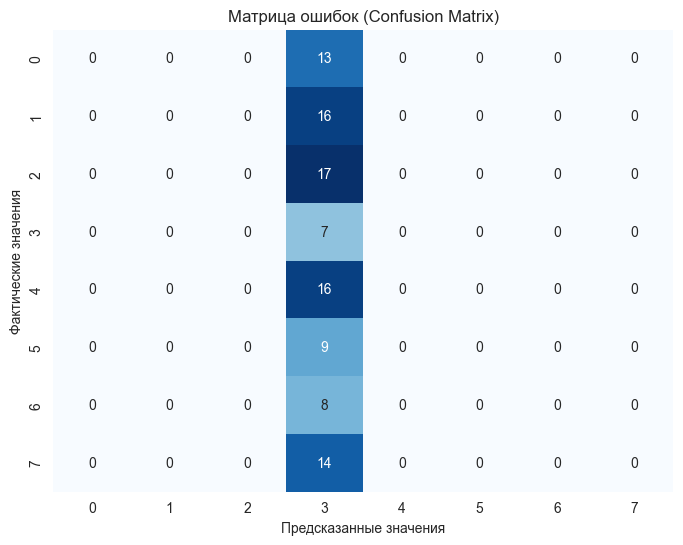

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print('Средняя точность модели: {:.3f}'.format(scores.mean()))

Средняя точность модели: 0.140


In [13]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg, X, y, cv=kfold)))
kfold3 = KFold(n_splits=3)
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg, X, y, cv=kfold3)))

Значения правильности перекрестной проверки: 
[0.1  0.11 0.06 0.08 0.08]
Значения правильности перекрестной проверки: 
[0.11377246 0.08383234 0.08433735]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
X = df.drop('target', axis=1)
y = df['target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('model accuracy:', accuracy)

model accuracy: 0.08


[[0 0 4 3 1 1 2 1]
 [1 2 4 4 5 0 1 1]
 [3 0 4 0 2 2 2 3]
 [2 2 9 2 2 1 0 2]
 [2 2 6 3 2 0 0 2]
 [1 1 4 2 3 0 0 1]
 [1 2 6 0 2 2 0 1]
 [1 0 7 3 2 2 1 0]]


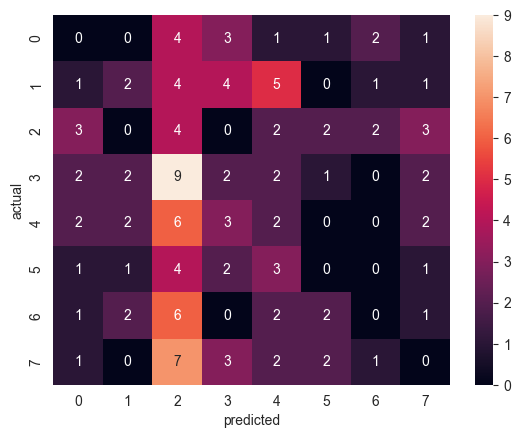

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

sns.heatmap(confusion, annot=True)

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [17]:
from sklearn.svm import SVC

best_svc = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        s_score = svm.score(X_test, y_test)

        if s_score > best_svc:
            best_svc = s_score
            best_combo = {'gamma': gamma, 'C': C}

print('best SVM score: {}'.format(best_svc))
print('best parameters: {}'.format(best_combo))

best SVM score: 0.152
best parameters: {'gamma': 0.01, 'C': 100}


In [18]:
from sklearn.model_selection import GridSearchCV

grid1 = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gs1 = GridSearchCV(SVC(), grid1, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gs1.fit(X_train, y_train)
score1 = gs1.score(X_test, y_test)

print('test score:', score1)
print('best params: ', gs1.best_params_)
print('best score: ', gs1.best_score_)
print('whole args view :', gs1.best_estimator_)

results1 = pd.DataFrame(gs1.cv_results_)
display(results1.head())

test score: 0.12
best params:  {'C': 1, 'gamma': 0.001}
best score:  0.16533333333333336
whole args view : SVC(C=1, gamma=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028984,0.005246,0.009339,0.000659,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.146667,0.146667,0.146667,0.133333,0.146667,0.144,0.005333,7
1,0.028560,0.005473,0.015411,0.011512,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.146667,0.146667,0.146667,0.133333,0.146667,0.144,0.005333,7
2,0.049994,0.010660,0.019022,0.008683,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.146667,0.146667,0.146667,0.133333,0.146667,0.144,0.005333,7
3,0.034701,0.006272,0.011515,0.001548,0.001,1,"{'C': 0.001, 'gamma': 1}",0.146667,0.146667,0.146667,0.133333,0.146667,0.144,0.005333,7
4,0.040327,0.002773,0.018738,0.009969,0.001,10,"{'C': 0.001, 'gamma': 10}",0.146667,0.146667,0.146667,0.133333,0.146667,0.144,0.005333,7


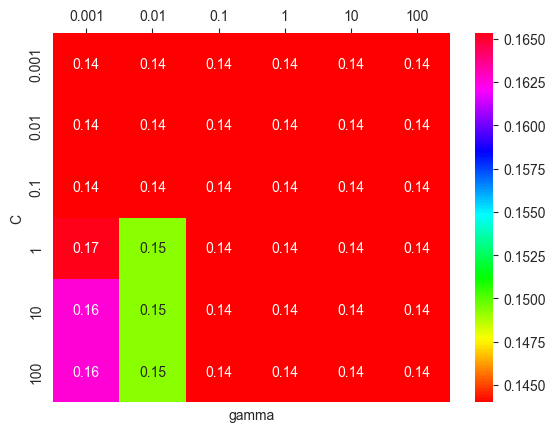

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sc = np.array(results1.mean_test_score).reshape(6, 6)
ax = sns.heatmap(sc, annot=True, xticklabels=grid1['gamma'], yticklabels=grid1['C'], cmap='hsv')
ax.set(xlabel='gamma', ylabel='C')
ax.xaxis.tick_top()

plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.22      0.11      0.15        18
           2       0.09      0.25      0.13        16
           3       0.12      0.10      0.11        20
           4       0.11      0.12      0.11        17
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        16

    accuracy                           0.08       125
   macro avg       0.07      0.07      0.06       125
weighted avg       0.08      0.08      0.07       125
